<a href="https://colab.research.google.com/github/IbukunGracey/Convolutional_Neural_Networks_Basics/blob/main/01_CNN_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Convolutional Neural Networks with MNIST Dataset

## Introduction to convnets
Before diving into building the CNN Model, lets look at the __MNIST__ dataset to understand image data representation.

### MNIST dataset
A classic in the machine-learning community.<br>
The problem we’re trying to solve here is to classify __grayscale images__ of __handwritten
digits (28 × 28 pixels) into their 10 categories (0 through 9)__. <br>
The dataset contains __60,000__ training images, plus __10,000__ test images.

https://www.tensorflow.org/datasets/catalog/mnist


In [298]:
#import statment
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from PIL import Image

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Transform Data

Befor importing the MNIST data, we need to tranform it.

The MNIST dataset is a 2 dimensional pictures, but we need to work in 4 dimension, because we need to track the number of images, height, width, and color channels

First, we need to convert the MNIST Image Files into a Tensor of 4- Dimensions (# of Images, Color Channel, Height, Width)

In [299]:
# Convert MNIST Image Files into 4-dim tensors using the transform library
# We first instantiate the transforms function
transform = transforms.ToTensor()

### 2. Get the dataset

In the datasets library, there are lots of datasets and MNIST is one of them. We will get the dataset and save in our colab root directory, set up the train and test data and transform to tensor.


In [300]:
# Train Data: We set the train arguement to True because we want to import the train set
train_data = datasets.MNIST(root='./cnn_data', train=True, download=True, transform=transform)

In [301]:
# Test Data: We set the train arguement to False because we want to import the test set
test_data = datasets.MNIST(root='./cnn_data', train=False, download=True, transform=transform)

In [302]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [303]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [304]:
## Check our current colab directory
!pwd

/content


In [305]:
## check the folders in the current directory, if cnn_data is not found
## You can change the directory using cd ../ and recheck pwd and ls
!ls

cnn_data  sample_data


### 3. Coding the individual steps to create the model

- Create a dataloader to determine the batch size, use small batch sizes for a start

In [306]:
# Create a small batch size for images --- eg. 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)  # we are not suffling the test_data

- Define our CNN model for a single image case

In [307]:

# Describe the Convolutional Layer and what it's doing (Let's start with 2 convolutional layers)
conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1)   # 1 image, 6 filters, 3 * 3 kernel size ,1 stride
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)

# padding wasn't included since the image is at the center, so losing the edges is not a problem

- View 1 of the train image and its label

In [308]:
#Grab 1 MNIST record/Image

for i, (x_train, y_train) in enumerate(train_data):
  print(i, x_train.shape, y_train)
  break

0 torch.Size([1, 28, 28]) 5


In [309]:
x_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [310]:
print(y_train)

5


In [311]:
# this is a 2d image, a greyscale with a size of 28 by 28 pixels (1.e 1 color channel)
x_train.shape

torch.Size([1, 28, 28])

#### Let's Visualize the image

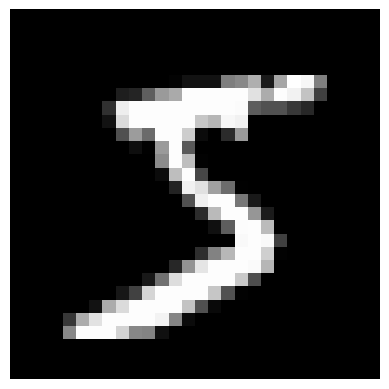

In [312]:
#convert tensor back into image
# Create a ToPILImage transform
transform_new = transforms.ToPILImage()

tensor = x_train

# Convert the tensor to a PIL Image
image = transform_new(tensor)

# Display the image (optional)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Save the image (optional)
# image.save("random_image.png")

- Transform the image to a 4 dimensional tensor

In [313]:
# Change image to a 4d- image
x = x_train.view(1,1,28,28) # 1 batch, 1 color channel, 28 by 28 pixel
x.shape

torch.Size([1, 1, 28, 28])

- Let's perform the convolutions that was earlier defined above

In [314]:
#1. Perform first convolution
x = F.relu(conv1(x)) # Rectified Linear Unit for our activation function

In [315]:
# Check the shape to see the output
x.shape  # 1 image, 6 is the filters, 26X26 is the image
# the image has been reduced to 26x26 because we didnt define the padding, so we lost 2 outer pixels

torch.Size([1, 6, 26, 26])

Note: For real world data, you need to set padding because you dont want to lose any data

In [316]:
#2. Pass image through a pooling layer
x = F.max_pool2d(x, 2,2) # Kernel size of 2, stride of 2

In [317]:
x.shape # kernel was set to 2 so 26/2 =13

torch.Size([1, 6, 13, 13])

In [318]:
#3. Perform second convolution
x = F.relu(conv2(x)) # Rectified Linear Unit for our activation function

In [319]:
x.shape # No padding was set so 2 pixels were lost

torch.Size([1, 16, 11, 11])

In [320]:
#4. Pass image through a pooling layer
x = F.max_pool2d(x, 2,2) # Kernel size of 2, stride of 2

In [321]:
x.shape # 11/2 = 5.5 but we have to round down because we can't invent data to round up

torch.Size([1, 16, 5, 5])

### 4. Let's code the actual Convolutional Neural Network Model

Bear in mind that we want to create a network in this format Conv1-Pool-Conv2-Pool-FCL. The Fully connected layer has 1 input layer, 1 hidden layer and 1 output layer.

The output size from the second pooling layer (5 * 5 *16) becomes the input to the fully connected layer.


In [322]:
class CNNModel(nn.Module):
  def __init__(self):
    super().__init__()
    # This is where we define the nework parameters
    self.conv1 = nn.Conv2d(1,6,3,1)  # First Convolution layer
    self.conv2 = nn.Conv2d(6,16,3,1) # Second Convolution Layer

    #fully connected layer
    self.fc1 = nn.Linear(5*5*16, 120)  # Take the size from the second pooling layer, and send it to 120 neuron ( This is an hyperparameter)
    self.fc2 = nn.Linear(120, 84)     # This is another hidden layer with 120 input and 84 output
    self.fc3 = nn.Linear(84, 10)     # the final layer ends with the total number of output class

  #Define the forward function, where we implement the network parameters Conv1-pool-Conv2-pool-flatten-Fully connected layer
  def forward(self, x):
    x = F.relu(self.conv1(x))   # 2 x2 kernel and stride 2
    x = F.max_pool2d(x, 2,2)
    #second pass
    x = F.relu(self.conv2(x))   # 2 x2 kernel and stride 2
    x = F.max_pool2d(x, 2,2)

    # Use the View function to flatten out the neurons
    x = x.view(-1, 16*5*5) #negative one so we can vary the batch size

    #Fully connected layer
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x, dim=1)

In [323]:
#Create an instance of our model
torch.manual_seed(41)
model = CNNModel()
model

CNNModel(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [324]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # the smaller the lr the longer the training time


### -- Uncomment to review this section, afterwards comment the section back the run the entire notebook to train the model---###

Before training the entire model, let see the result of the training loop for the first batch of 10 inputs.

In [325]:
# for b, (x_train, y_train) in enumerate(train_loader):
#   b+=1  # start our batches at 1
#   y_pred = model(x_train) #get predicted values from the training set. Not flattened
#   loss = criterion(y_pred, y_train)# what is the error? Compare the predicted vs correct
#   print(f'Batch: {b} Loss: {loss.item()}')
#   print(y_pred.data)
#   predicted = torch.max(y_pred.data, 1)[1]  # get the exact predicted value for each input in this batch
#   print(predicted)
#   break

In [326]:
# # This is how it works, for more reference see https://docs.pytorch.org/docs/stable/generated/torch.max.html
# predicted = torch.max(y_pred.data, 1)[1]
# predicted

In [327]:
# y_train

In [328]:
# # Compare predIctions and actual value to track the correct predictions
# correct_predictions_in_batch_1 = (predicted == y_train).sum()
# correct_predictions_in_batch_1

### 5. Train the CNN model

In [329]:
# This is where we train the CNN model, Let us also track the time taken to train the model
import time
start_time = time.time()

#create variables to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#Create a for loop of epoch
for i in range(epochs):
  train_correct_count = 0
  test_correct_count = 0

  # Train
  for b, (x_train, y_train) in enumerate(train_loader):
    b+=1  # start our batches at 1
    y_pred = model(x_train) #get predicted values from the training set
    loss = criterion(y_pred, y_train)# what is the error? Compare the predicted vs correct

    predicted = torch.max(y_pred.data, 1)[1] # add correct prediction. Index out the first item
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch
    train_correct_count += batch_corr #keep track as we go in training

    #Update our parameter
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Print out results after every 600 images
    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(train_correct_count)

  # Test

  with torch.no_grad():
    for b, (x_test, y_test) in enumerate(test_loader):
      y_val = model(x_test)
      predicted = torch.max(y_val.data, 1)[1]   # Adding up correct preditions
      test_correct_count += (predicted == y_test).sum()
  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(test_correct_count)
current_time = time.time()
elapsed_time = current_time - start_time
print(f"Training took: {elapsed_time/60} minutes")

Epoch: 0 Batch: 600 Loss: 0.1623610556125641
Epoch: 0 Batch: 1200 Loss: 0.1502392590045929
Epoch: 0 Batch: 1800 Loss: 0.4744560718536377
Epoch: 0 Batch: 2400 Loss: 0.14238706231117249
Epoch: 0 Batch: 3000 Loss: 0.007758188061416149
Epoch: 0 Batch: 3600 Loss: 0.3836284875869751
Epoch: 0 Batch: 4200 Loss: 0.0038223876617848873
Epoch: 0 Batch: 4800 Loss: 0.0021286322735249996
Epoch: 0 Batch: 5400 Loss: 0.0569545142352581
Epoch: 0 Batch: 6000 Loss: 0.00038789428072050214
Epoch: 1 Batch: 600 Loss: 0.005851339548826218
Epoch: 1 Batch: 1200 Loss: 0.3855525553226471
Epoch: 1 Batch: 1800 Loss: 0.004819948226213455
Epoch: 1 Batch: 2400 Loss: 0.003216963727027178
Epoch: 1 Batch: 3000 Loss: 0.0332382395863533
Epoch: 1 Batch: 3600 Loss: 0.5372857451438904
Epoch: 1 Batch: 4200 Loss: 0.04561494290828705
Epoch: 1 Batch: 4800 Loss: 0.0007510822033509612
Epoch: 1 Batch: 5400 Loss: 0.0001173773780465126
Epoch: 1 Batch: 6000 Loss: 0.14201366901397705
Epoch: 2 Batch: 600 Loss: 0.023733172565698624
Epoch: 2

###  Visualize the loss at each Epoch

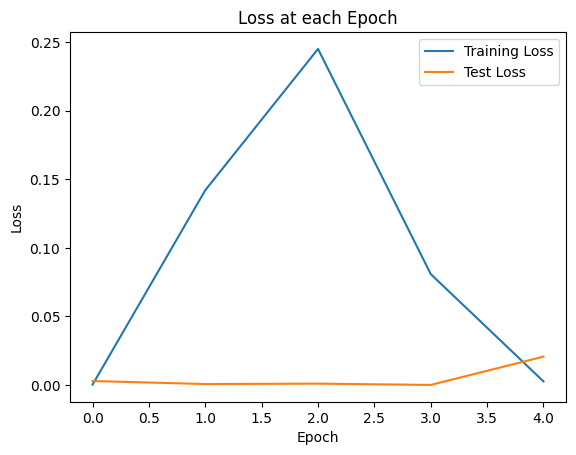

In [330]:
train_losses =[tl.item() for tl in train_losses]
test_losses =[tl.item() for tl in test_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss at each Epoch')
plt.legend()

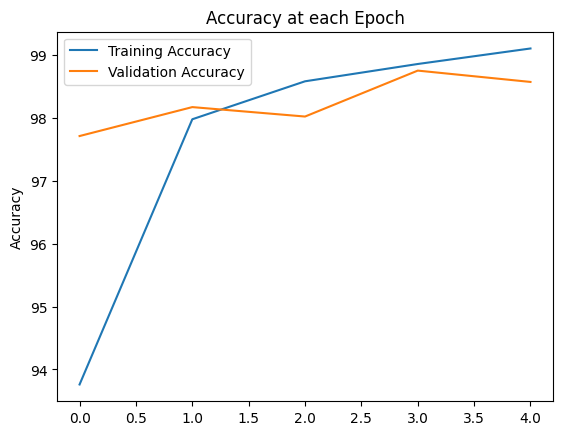

In [333]:
# graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.ylabel('Accuracy')
plt.title('Accuracy at each Epoch')
plt.legend()


In [334]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [335]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [337]:
# Did for correct
round(correct.item()/len(test_data)*100, 2)


98.57

### Make New Prediction

In [338]:
# Grab an image
test_data[1978] # Tensor with an image in it...at end, it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

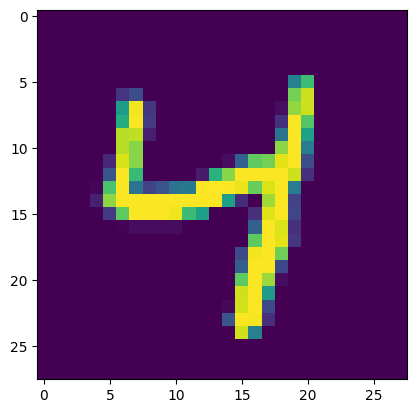

In [341]:
# Show the image
plt.imshow(test_data[1978][0].reshape(28,28))

In [339]:
# Pass the image thru our model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[1978][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28x28 imag

In [340]:
new_prediction.argmax()

tensor(4)